In [1]:
#Las Siguientes lineas no requieren de ninguna modificación, 
#son las librerias necesarias para el funcionamiento de la libreta
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import matplotlib.colors as colors
colores = list(colors._colors_full_map.values())
output_notebook()

#archivo1='../Thingsboard/filtrados.csv'
archivo1='../Thingsboard/marzo_2020.csv'
archivo2='../Thingsboard/totales.csv'

columnas  = ['ts','T1','T2','T3','T4','T5','T6','T7','A1','A2','A3','A4','A5','A6','A7']
columnas2  = ['ts','T1','T2','T3','T4','T5','T6','T7']

def importa(archivo,columnas):
    
    tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=4)
    #tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=200)
    tmp=tmp.set_index('ts')
    tmp=tmp.dropna()
    return tmp


Loading BokehJS ...

In [2]:
datos=importa(archivo1,columnas)

datos.index=pd.to_datetime(datos.index,format='%d/%m/%Y  %H:%M')
#adquisidor=importa(archivo2,columnas)
#adquisidor.index=pd.to_datetime(adquisidor.index,format='%d/%m/%Y  %H:%M')

##a veces estaremos interesados en una ventana especifica de tiempo por lo que estas lineas nos 
#permiten elegir fecha y hora inicial y final de los datos que deseamos guardar, es necesario respetar
# el formato completo para evitar problemas : 'YYYY-MONTH-DD HH:MM:SS' ejemplo: fecha1 = '2020-March-23 16:30:00'

#fecha1 = '2020-03-25 10:05:00'
#fecha2 = '2020-03-25 15:05:00'

#datos=datos[fecha2:fecha1]
#datos.to_csv('filtrados_25.csv')
print(len(datos))
values = [85, 100,-127]
#datos=datos[datos.T7.isin(values) == True]
#print(len(datos))


1156


In [3]:
#Estas lineas nos permiten importar todos los datos que se enviaron bajo una misma etiqueta
#se pueden estipular los nombres que se vean mas convenientes para las variables pero se recomienda
#continuar con el formato de ejemplo para no requerir mayor edición mas adelante
A01 = datos.T1
A02 = datos.T2
A03 = datos.T3
A04 = datos.T4
A05 = datos.T5
A06 = datos.T6
A07 = datos.T7

AD01 = datos.A1
AD02 = datos.A2
AD03 = datos.A3
AD04 = datos.A4
AD05 = datos.A5
AD06 = datos.A6
AD07 = datos.A7


#las siguientes lineas crean una grafica con los datos importados anteriormente y respetando las fechas
#solicitadas,  para cambiar las fechas es necesario volver a correr todas las celdas



In [4]:
p = figure(title="Temperaturas Sensor 3", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=datos.index,y=datos.A1,color=colores[8],legend_label='Adquisidor_1')
p.scatter(x=datos.index,y=datos.A3,color=colores[11],legend_label='Adquisidor_3')
p.scatter(x=datos.index,y=datos.T3,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [5]:
p = figure(title="Temperaturas Sensor 4", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=datos.index,y=datos.A4,color=colores[8],legend_label='Adquisidor')
p.scatter(x=datos.index,y=datos.T4,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [6]:
p = figure(title="Temperaturas Sensor 6", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=datos.index,y=datos.A6,color=colores[8],legend_label='Adquisidor')
p.scatter(x=datos.index,y=datos.T6,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [7]:
p = figure(title="Temperaturas Sensor 7", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=datos.index,y=datos.A7,color=colores[8],legend_label='Adquisidor')
p.scatter(x=datos.index,y=datos.T7,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [8]:
d3=(abs(datos.A3-datos.T3))
d4=(abs(datos.A4-datos.T4))
d6=(abs(datos.A6-datos.T6))
d7=(abs(datos.A7-datos.T7))

In [9]:
d7.max()

148.4

In [10]:
d3.mean()

0.7195285467127983

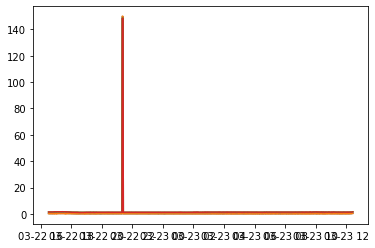

In [11]:
plt.plot(d3)
plt.plot(d4)
plt.plot(d6)
plt.plot(d7)

NameError: name 'dif03' is not defined

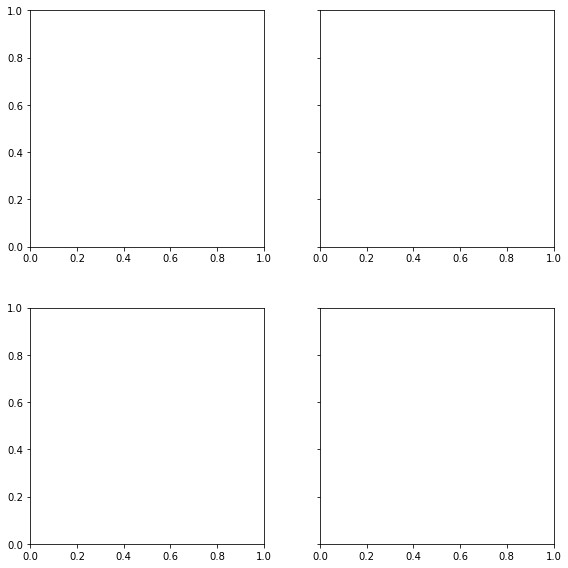

In [12]:
fig, ax=plt.subplots(2,2,figsize=(8,8),sharey=True)

fig.tight_layout(h_pad=4, w_pad=4)
ax[0,0].plot(dif03)
ax[0,1].plot(dif04)
ax[1,0].plot(dif06)
ax[1,1].plot(dif07)

ax[0, 0].set_title("S_1")
ax[0, 1].set_title("S_2")
ax[1, 0].set_title("S_3")
ax[1, 1].set_title("S_4")


ax[0, 0].set_ylabel('Temperatura [°C]')
ax[0, 1].set_ylabel('Temperatura [°C]')
ax[1, 0].set_ylabel('Temperatura [°C]')
ax[1, 1].set_ylabel('Temperatura [°C]')

ax[0, 0].set_xlabel('Tiempo')
ax[0, 1].set_xlabel('Tiempo')
ax[1, 0].set_xlabel('Tiempo')
ax[1, 1].set_xlabel('Tiempo')